In [2]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np

In [3]:
# %matplotlib notebook
from sympl import get_constant
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index= pickle.load(f)

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

Lv=2260000

lat1=5
lat2=31
lon1=15
lon2=61

common=xr.open_zarr("common",consolidated=False)
lat_rad=np.radians(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_rad=np.radians(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_diff=lat_deg[0,0]-lat_deg[1,0]
lon_diff=lon_deg[0,1]-lon_deg[0,0]

Lx=np.radians(lon_diff)*6371*1000
Ly=np.radians(lat_diff)*6371*1000

clim=xr.open_zarr("/home/scratch/Abel_data/climatology_1000",consolidated=False)
temp_clim=clim['air_temperature'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
uwind_clim=clim['eastward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
nwind_clim=clim['northward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
press_clim=clim['air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
spress_clim=clim['surface_air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
sens_clim=clim['surface_upward_sensible_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
latent_clim=clim['surface_upward_latent_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

# nwind_clim=interpol1d(nwind_clim, press_clim)
# uwind_clim=interpol1d(uwind_clim, press_clim)
press_int=np.insert(p_std, 0, 101300)      
dp=(press_int[:-1]-press_int[1:])

int_list=[]
dur_list=[]

for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])


u=[]
v=[]
p=[]
U=[]
V=[]
P=[]

test=0

for e in heat_index:
    
    if (dur_list[test]>=cut[4]  and dur_list[test]<=cut[5]):
    
    #     if test==10:
    #         break

#         test=test+1

        print(test)

        i=e[0]
        j=int(e[1])
    #     print(i,j)
        t_list=e[2]
        ignore=0

        for t in t_list:

    #         t=t_0+k
            D=xr.open_zarr("/home/scratch/Abel_data/long_run2/run"+str(i)+"/year"+str(j),consolidated=False)
            temp=D['air_temperature'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            uwind=D['eastward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            nwind=D['northward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            press=D['air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            spress=D['surface_air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            sens=D['surface_upward_sensible_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            latent=D['surface_upward_latent_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

#             if np.min(press.values[0])<95000:
#                 ignore=1
#                 print(np.min(press.values[0]))
#                 continue

#             uwind=interpol1d(uwind, press)
#             nwind=interpol1d(nwind, press)

            u.append(uwind-uwind_clim)
            v.append(nwind-nwind_clim)
            p.append(spress-spress_clim)

        if ignore==0:
            U.append(u)
            V.append(v)
            P.append(p)
            
        u=[]
        v=[]
        p=[]
    test=test+1

with gzip.open('/home/scratch/Abel_data/wind_longv3', 'wb') as f:
    pickle.dump([U, V, P], f)

5
11
12
20
22
27
28
38
44
52
57
68
122
127
133
137
162
194
199
202
207
215
220
226
233
244
245
268
278
279
289
297
300
329
346
355
367
387
398
408
412
419
445
447
448
450
454
458
460
473
477
482
511
513
521
522
540
557
560
567
570
582
584
601
618
627
634
636
640
642
648
659
667
674
689
700
706
720
726
736
756
757
768
771
787
808
828
845
846
847
858
871
882
885
910
916
917
923
928
941
951
967
983
987
995
1000
1024
1041
1047
1049
1077
1082
1086
1115
1136
1138
1144
1160
1173
1190
1207
1248
1281
1299
1301
1307
1315
1332
1349
1374
1385
1386
1388
1391
1392
1413
1416
1427
1435
1457
1462
1480
1491
1494
1501
1507
1521
1528
1532
1539
1540
1562
1566
1567
1576
1599
1604
1641
1651
1683
1698
1710
1717
1724
1730
1743
1745
1752
1756
1759
1763
1799
1801
1805
1808
1809
1826
1839
1848
1850
1852
1855
1859
1861
1872
1873
1874
1875


In [4]:
# %matplotlib notebook
from sympl import get_constant
from scipy import interpolate

with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index= pickle.load(f)

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

Lv=2260000

lat1=5
lat2=31
lon1=15
lon2=61

common=xr.open_zarr("common",consolidated=False)
lat_rad=np.radians(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_rad=np.radians(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

lat_diff=lat_deg[0,0]-lat_deg[1,0]
lon_diff=lon_deg[0,1]-lon_deg[0,0]

Lx=np.radians(lon_diff)*6371*1000
Ly=np.radians(lat_diff)*6371*1000

clim=xr.open_zarr("/home/scratch/Abel_data/climatology_1000",consolidated=False)
temp_clim=clim['air_temperature'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
uwind_clim=clim['eastward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
nwind_clim=clim['northward_wind'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
press_clim=clim['air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
spress_clim=clim['surface_air_pressure'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
sens_clim=clim['surface_upward_sensible_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
latent_clim=clim['surface_upward_latent_heat_flux'].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000
def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

# nwind_clim=interpol1d(nwind_clim, press_clim)
# uwind_clim=interpol1d(uwind_clim, press_clim)
press_int=np.insert(p_std, 0, 101300)      
dp=(press_int[:-1]-press_int[1:])

int_list=[]
dur_list=[]

for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])


u=[]
v=[]
p=[]
U=[]
V=[]
P=[]

test=0

for e in heat_index:
    
    if (int_list[test]>=cut[4]  and int_list[test]<=cut[5]):
    
    #     if test==10:
    #         break

#         test=test+1

        print(test)

        i=e[0]
        j=int(e[1])
    #     print(i,j)
        t_list=e[2]
        ignore=0

        for t in t_list:

    #         t=t_0+k
            D=xr.open_zarr("/home/scratch/Abel_data/long_run2/run"+str(i)+"/year"+str(j),consolidated=False)
            temp=D['air_temperature'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            uwind=D['eastward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            nwind=D['northward_wind'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            press=D['air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            spress=D['surface_air_pressure'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            sens=D['surface_upward_sensible_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))
            latent=D['surface_upward_latent_heat_flux'][t].sel(lat=range(lat1,lat2),lon=range(lon1,lon2))

#             if np.min(press.values[0])<95000:
#                 ignore=1
#                 print(np.min(press.values[0]))
#                 continue

#             uwind=interpol1d(uwind, press)
#             nwind=interpol1d(nwind, press)

            u.append(uwind-uwind_clim)
            v.append(nwind-nwind_clim)
            p.append(spress-spress_clim)

        if ignore==0:
            U.append(u)
            V.append(v)
            P.append(p)
            
        u=[]
        v=[]
        p=[]
    test=test+1

with gzip.open('/home/scratch/Abel_data/wind_intensev3', 'wb') as f:
    pickle.dump([U, V, P], f)

5
22
30
45
49
56
57
65
68
72
78
88
90
97
103
118
123
138
160
164
167
177
181
202
207
212
216
223
235
237
244
250
254
256
276
288
291
294
304
308
309
329
331
363
367
390
391
396
413
418
429
437
440
446
456
473
479
481
486
492
501
532
536
538
547
552
568
569
600
610
628
634
640
661
699
700
708
713
719
748
751
757
764
779
787
797
805
807
808
811
826
832
838
849
854
858
863
875
883
887
913
917
921
925
966
973
975
976
980
987
995
998
1010
1032
1039
1050
1054
1110
1122
1138
1160
1163
1186
1192
1222
1243
1244
1254
1267
1268
1276
1321
1349
1354
1355
1358
1359
1365
1366
1372
1382
1386
1394
1416
1435
1445
1453
1454
1473
1509
1511
1527
1564
1572
1588
1590
1618
1641
1662
1663
1670
1676
1681
1718
1745
1746
1751
1752
1753
1754
1757
1758
1761
1773
1777
1786
1810
1812
1826
1831
1839
1841
1845
1848
1850
1863
1872
1876


<IPython.core.display.Javascript object>


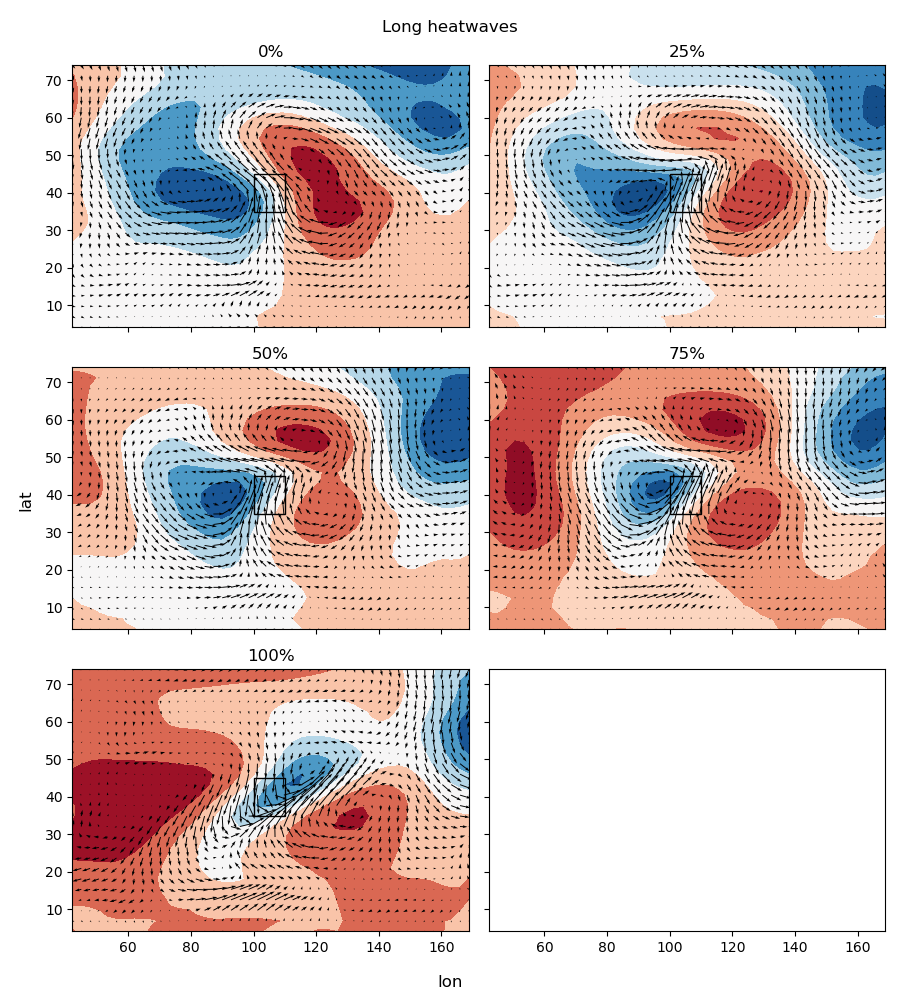

In [5]:
%matplotlib notebook
from scipy import interpolate

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 10)

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/wind_longv3', 'rb') as f:
    wind=pickle.load(f)
    
uwind=wind[0]
nwind=wind[1]
spress=wind[2]
    
lat1=5
lat2=31
lon1=15
lon2=61

import os
os.chdir('/home/scratch/Abel_data/long_run2')  
common=xr.open_zarr("common",consolidated=False)

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

t_std=np.array([0,0.25,0.5,0.75,1])

def intercomp(X, t):
    
    h,lt,ln=np.shape(X)
    out=np.zeros((len(t_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(t[:], X[:,i,j])
            out[:,i,j]=f(t_std)
            
    return out

u_list=[]
v_list=[]
p_list=[]

for i in range(len(uwind)):
    
    u=uwind[i]
    v=nwind[i]
    p=spress[i]
        
    u=np.array(u)
    v=np.array(v)
    p=np.array(p)
    
#     print(np.shape(u[:,0,:,:]))
    u=intercomp(u[:,0,:,:], np.linspace(0,1,len(u)))
    v=intercomp(v[:,0,:,:], np.linspace(0,1,len(v)))
    p=intercomp(p, np.linspace(0,1,len(p)))
    
    u_list.append(u)
    v_list.append(v)
    p_list.append(p)

u_mean=np.array(u_list).mean(axis=0)
v_mean=np.array(v_list).mean(axis=0)
p_mean=np.array(p_list).mean(axis=0)

import matplotlib.patches as patches

ind=0
ax[0][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][0].add_patch(rect)
ax[0][0].set_title('0%')

ind=1
ax[0][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][1].add_patch(rect)
ax[0][1].set_title('25%')

ind=2
ax[1][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][0].add_patch(rect)
ax[1][0].set_title('50%')

ind=3
ax[1][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][1].add_patch(rect)
ax[1][1].set_title('75%')

ind=4
ax[2][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[2][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[2][0].add_patch(rect)
ax[2][0].set_title('100%')


fig.supxlabel('lon')
fig.supylabel('lat')
fig.suptitle('Long heatwaves')
plt.tight_layout()

<IPython.core.display.Javascript object>


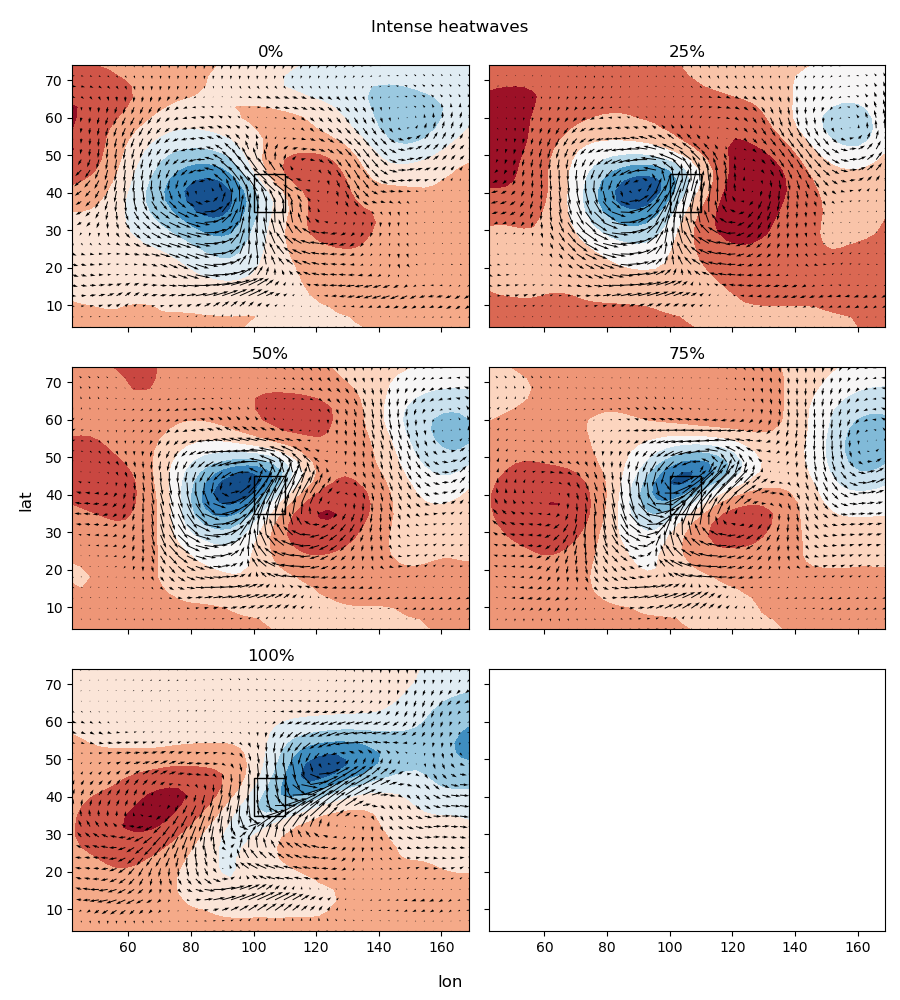

In [6]:
%matplotlib notebook
from scipy import interpolate

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_size_inches(9, 10)

p_std = np.arange(0.1, 9.7 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv3', 'rb') as f:
    heat_index= pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/wind_intensev3', 'rb') as f:
    wind=pickle.load(f)
    
uwind=wind[0]
nwind=wind[1]
spress=wind[2]
    
lat1=5
lat2=31
lon1=15
lon2=61

import os
os.chdir('/home/scratch/Abel_data/long_run2')  
common=xr.open_zarr("common",consolidated=False)

lat_deg=(common['latitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]
lon_deg=(common['longitude']).sel(lat=range(lat1,lat2),lon=range(lon1,lon2)).values[:]

t_std=np.array([0,0.25,0.5,0.75,1])

def intercomp(X, t):
    
    h,lt,ln=np.shape(X)
    out=np.zeros((len(t_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(t[:], X[:,i,j])
            out[:,i,j]=f(t_std)
            
    return out

u_list=[]
v_list=[]
p_list=[]

for i in range(len(uwind)):
    
    u=uwind[i]
    v=nwind[i]
    p=spress[i]
        
    u=np.array(u)
    v=np.array(v)
    p=np.array(p)
    
#     print(np.shape(u[:,0,:,:]))
    u=intercomp(u[:,0,:,:], np.linspace(0,1,len(u)))
    v=intercomp(v[:,0,:,:], np.linspace(0,1,len(v)))
    p=intercomp(p, np.linspace(0,1,len(p)))
    
    u_list.append(u)
    v_list.append(v)
    p_list.append(p)

u_mean=np.array(u_list).mean(axis=0)
v_mean=np.array(v_list).mean(axis=0)
p_mean=np.array(p_list).mean(axis=0)

import matplotlib.patches as patches

ind=0
ax[0][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][0].add_patch(rect)
ax[0][0].set_title('0%')

ind=1
ax[0][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[0][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[0][1].add_patch(rect)
ax[0][1].set_title('25%')

ind=2
ax[1][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][0].add_patch(rect)
ax[1][0].set_title('50%')

ind=3
ax[1][1].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[1][1].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[1][1].add_patch(rect)
ax[1][1].set_title('75%')

ind=4
ax[2][0].contourf(lon_deg, lat_deg, p_mean[ind], cmap='RdBu_r')
ax[2][0].quiver(lon_deg, lat_deg, u_mean[ind], v_mean[ind])
rect = patches.Rectangle((100, 35), 10, 10, linewidth=1, edgecolor='black', facecolor='none')
ax[2][0].add_patch(rect)
ax[2][0].set_title('100%')


fig.supxlabel('lon')
fig.supylabel('lat')
fig.suptitle('Intense heatwaves')
plt.tight_layout()